<a href="https://colab.research.google.com/github/adedoyin-a/water-pollution-prediction/blob/main/AIE_557_Research_Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# install needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix

from google.colab import files
uploaded = files.upload()

Saving Beach_Water_Quality_-_Automated_Sensors_20250404.csv to Beach_Water_Quality_-_Automated_Sensors_20250404 (1).csv


Accuracy: 0.9458605664488018
Precision: 0.8632148377125193
Recall: 0.7773138482950591
F1 Score: 0.8180153789820579
Classification Report:
               precision    recall  f1-score   support

    Polluted       0.86      0.78      0.82      1437
        Safe       0.96      0.98      0.97      7743

    accuracy                           0.95      9180
   macro avg       0.91      0.88      0.89      9180
weighted avg       0.94      0.95      0.94      9180

Confusion Matrix:
 [[1117  320]
 [ 177 7566]]


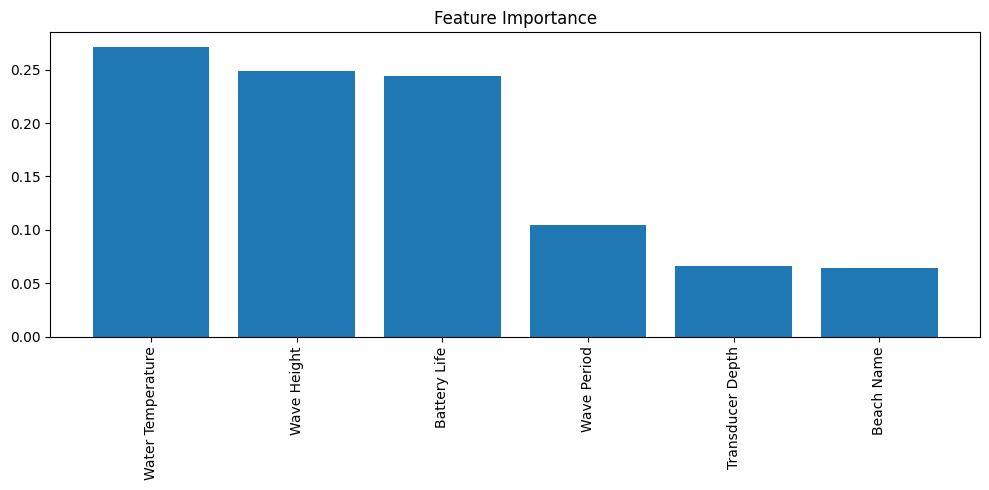

Confusion Matrix:
 [[1117  320]
 [ 177 7566]]
Cross-validation scores: [0.8537037  0.68191721 0.64814815 0.72110252 0.33140865]
Mean cross-validation score: 0.6472560459949193


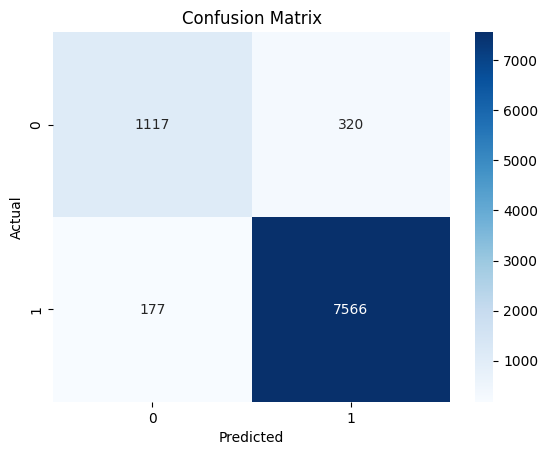

In [28]:

df = pd.read_csv('Beach_Water_Quality_-_Automated_Sensors_20250404.csv')
df.head()

# drop columns that are not needed for RandomForest Classification

df = df.drop(['Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID'], axis=1, errors='ignore')

# Encode Beach Name

le = LabelEncoder()
df['Beach Name'] = le.fit_transform(df['Beach Name'])

df['Pollution Status'] = df['Turbidity'].apply(lambda x: 'Polluted' if x > 5 else 'Safe')

# Features and labels

X = df.drop(['Pollution Status', 'Turbidity'], axis=1)
y = df['Pollution Status']

# drop rows with missing turbidity value

df = df.dropna(subset=['Turbidity'])

# split dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make prediction

y_pred = model.predict(X_test)

df.head()

# Evaluate model performance

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='Polluted'))
print('Recall:', recall_score(y_test, y_pred, pos_label='Polluted'))
print('F1 Score:', f1_score(y_test, y_pred, pos_label='Polluted'))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Plot feature importance

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Print Confusion matrix , cross-validation scores and mean cross-validation score for model

from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('Cross-validation scores:', cross_val_score(model, X, y, cv=5))
print('Mean cross-validation score:', cross_val_score(model, X, y, cv=5).mean())

# Plot Confusion Matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,3.15,NaN,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,2.18,NaN,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,1.92,NaN,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,1.81,NaN,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,0.03,NaN,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900


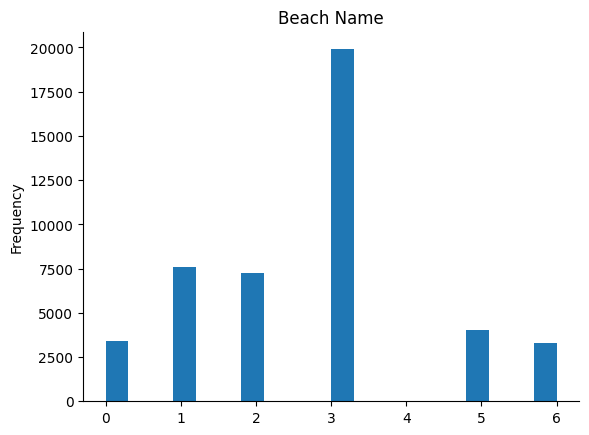

In [21]:
# @title Beach Name

from matplotlib import pyplot as plt
df['Beach Name'].plot(kind='hist', bins=20, title='Beach Name')
plt.gca().spines[['top', 'right',]].set_visible(False)

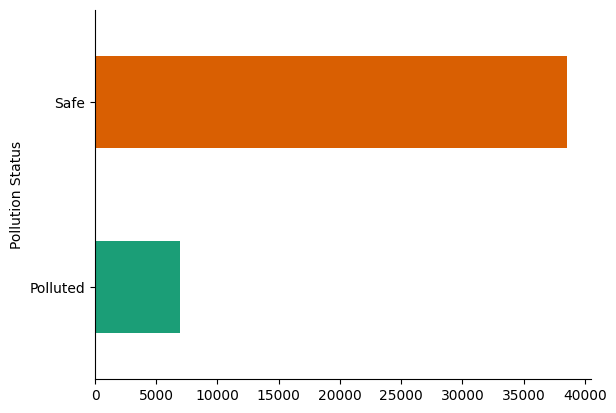

In [23]:
# @title Pollution Status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Pollution Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-20-f9022ede19d7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Transducer Depth', y='Pollution Status', inner='box', palette='Dark2')


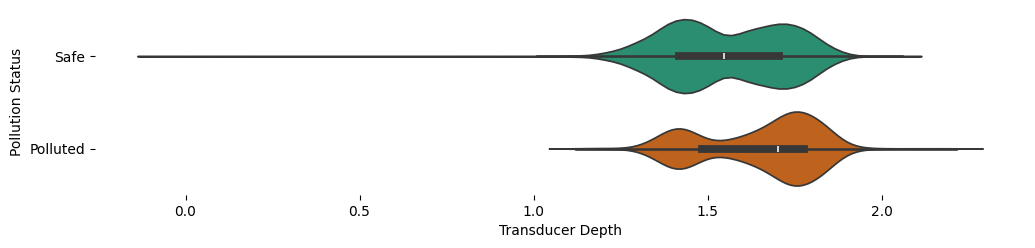

In [20]:
# @title Pollution Status vs Transducer Depth

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Pollution Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Transducer Depth', y='Pollution Status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-8-db287aa4b226>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Turbidity', y='Pollution Status', inner='box', palette='Dark2')


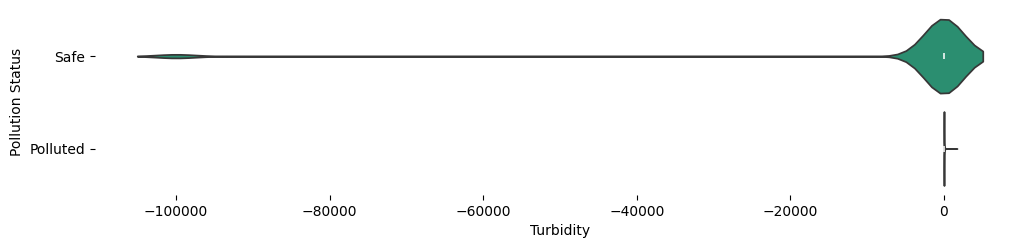

In [8]:
# @title Pollution Status vs Turbidity

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Pollution Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Turbidity', y='Pollution Status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

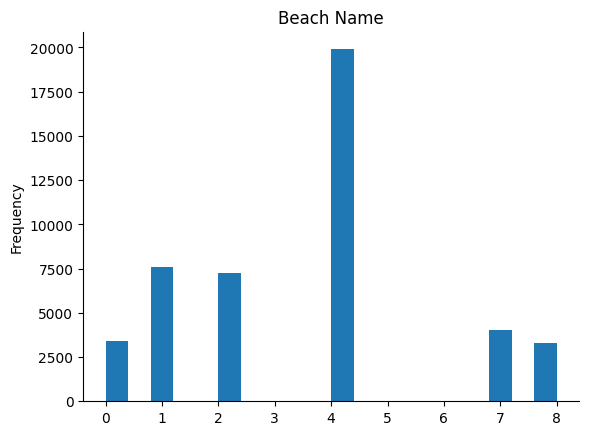

In [7]:
# @title Beach Name

from matplotlib import pyplot as plt
df['Beach Name'].plot(kind='hist', bins=20, title='Beach Name')
plt.gca().spines[['top', 'right',]].set_visible(False)